In [1]:
import os

In [2]:
%pwd

'c:\\Users\\KUNAL MEHTA\\Desktop\\Data Science Training\\Projects\\Auto-Insurance-Risk-Profiling\\research'

In [3]:
os.chdir('../')

In [4]:
%pwd

'c:\\Users\\KUNAL MEHTA\\Desktop\\Data Science Training\\Projects\\Auto-Insurance-Risk-Profiling'

In [8]:
!pip install shap

   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   ----- ---------------------------------- 61.4/456.1 kB 1.1 MB/s eta 0:00:01
   ------------- -------------------------- 153.6/456.1 kB 1.5 MB/s eta 0:00:01
   -------------------- ------------------- 235.5/456.1 kB 1.6 MB/s eta 0:00:01
   --------------------------- ------------ 317.4/456.1 kB 1.8 MB/s eta 0:00:01
   ----------------------------------- ---- 409.6/456.1 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.7 MB 1.8 MB/s eta 0:00:02
   -- ------------------------------------- 0.2/2.7 MB 2.4 MB/s eta 0:00:02
   ---- ----------------------------------- 0.3/2.7 MB 2.4 MB/s eta 0:00:02
   ------ --------------------------------- 0.4/2.7 MB 2.4 MB/s eta 0:00:01
   ------- -------------------------------- 0.5/2.7 MB 2.1 MB/s eta 0:00:02
 

In [19]:
import pandas as pd
import shap
import joblib
from pathlib import Path

In [22]:
class_model_path= "artifacts/model_trainer/class_model.joblib"
reg_model_path= "artifacts/model_trainer/reg_model.joblib"
test_data_path = "artifacts/data_transformation/Processed_test_data.csv"

In [23]:
class_model = joblib.load(Path(class_model_path))
reg_model = joblib.load(Path(reg_model_path))
test_data = pd.read_csv(Path(test_data_path))

In [24]:
explainer_class = shap.TreeExplainer(class_model)
explainer_reg = shap.TreeExplainer(reg_model)

In [16]:
explainer_class

In [17]:
explainer_reg

In [32]:
shap_values_class = explainer_class(test_data)
shap_values_reg = explainer_reg(test_data)

In [34]:
shap_values_reg[0]

.values =
array([-1.16266389e+00,  7.66211979e-03, -2.99561159e-01,  1.09835763e-02,
       -1.71017969e-02, -1.78482794e-01, -5.95583215e-02, -3.43453757e-02,
        1.29447739e-02, -2.14545573e-04, -7.71157132e-03, -8.60085131e-02,
       -1.78076155e-02, -2.48139539e-03, -4.94277496e-03, -7.30268806e-03,
       -2.31112204e-04, -1.69124458e-03,  5.02700314e-02, -1.61000916e-02,
        7.30939116e-03,  4.92946675e-02,  2.22462027e-02, -2.86129510e-01,
       -3.26767507e-02, -5.09038604e-02, -2.80973388e-01,  1.21108863e-01,
        1.76215896e-01])

.base_values =
7.09113276679755

.data =
array([750.0, 124.5, 0.7419373447293773, False, False, True, False, False,
       False, False, False, True, False, False, False, False, False,
       False, False, False, False, False, False, True, False, False, True,
       False, False], dtype=object)

In [33]:
shap_values_class[0]

.values =
array([-7.85048468e-01,  1.33507678e-01,  5.23582660e-05, -5.98820981e-01,
       -3.27779381e-02,  4.35902411e-03, -1.07342001e-01,  8.44393072e-03,
       -3.96405665e-03,  1.67034392e-05, -2.86645642e-05,  1.03966261e-03,
       -1.97095929e-05, -2.91761344e-05,  1.14155871e-03,  4.54668745e-04,
       -1.43787759e-04,  7.45716265e-03, -4.56983741e-04, -2.83482925e-03,
       -2.00235113e-03,  3.55829090e-02,  1.06918343e-01, -4.20885017e-01,
        5.34590262e-02,  9.89242587e-03,  3.22489431e-03,  1.65935143e-02,
       -1.42336962e-03])

.base_values =
-2.0908059925411835

.data =
array([750.0, 124.5, 0.7419373447293773, False, False, True, False, False,
       False, False, False, True, False, False, False, False, False,
       False, False, False, False, False, False, True, False, False, True,
       False, False], dtype=object)

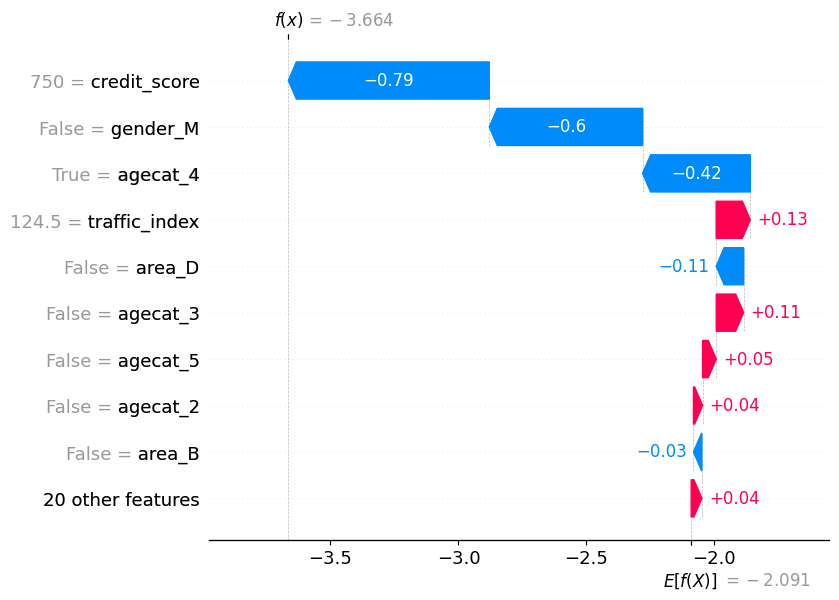

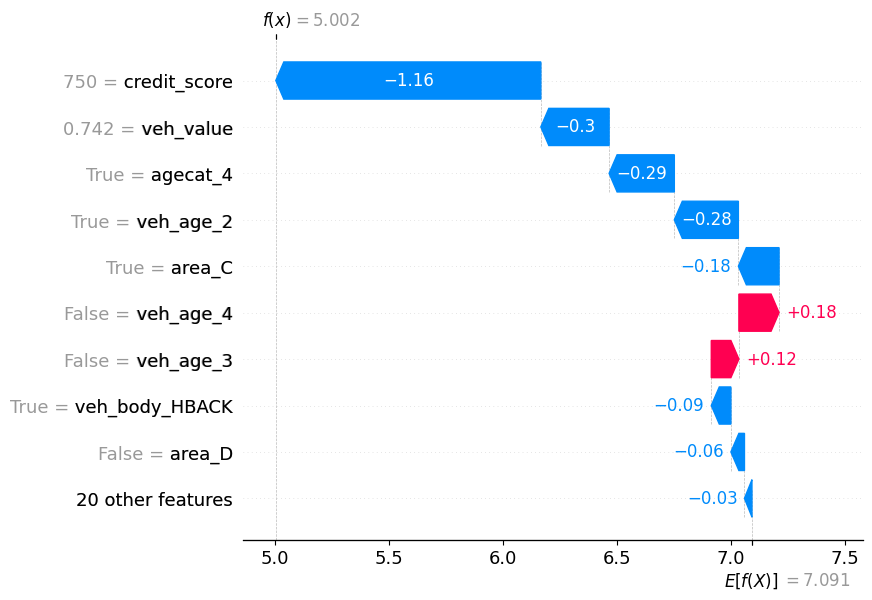

In [49]:
shap.plots.waterfall(shap_values_class[0])
shap.plots.waterfall(shap_values_reg[0])

In [52]:
shap.initjs()
shap.plots.force(shap_values_class[0])

In [51]:
shap.initjs()
shap.plots.force(shap_values_reg[0])

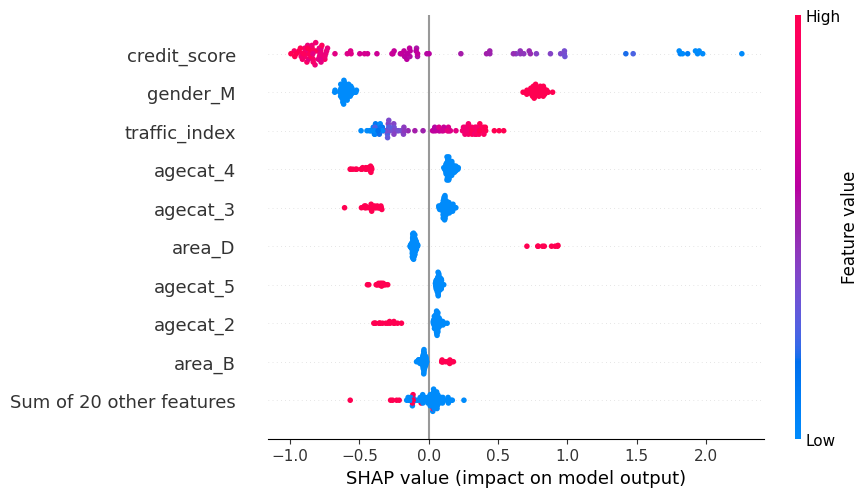

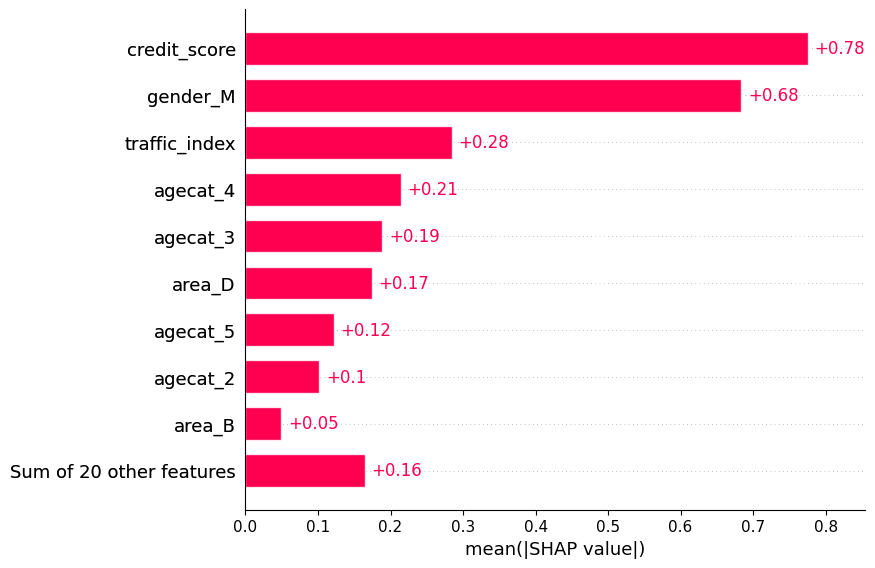

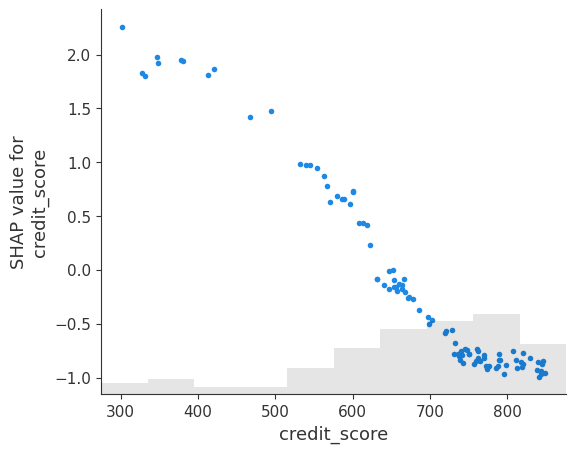

In [46]:
shap.plots.beeswarm(shap_values_class)
shap.plots.bar(shap_values_class)
shap.plots.scatter(shap_values_class[:, 'credit_score'])

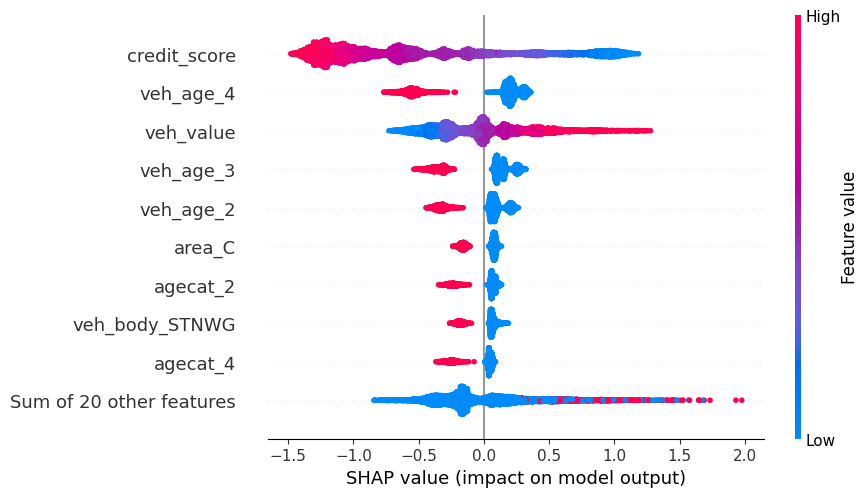

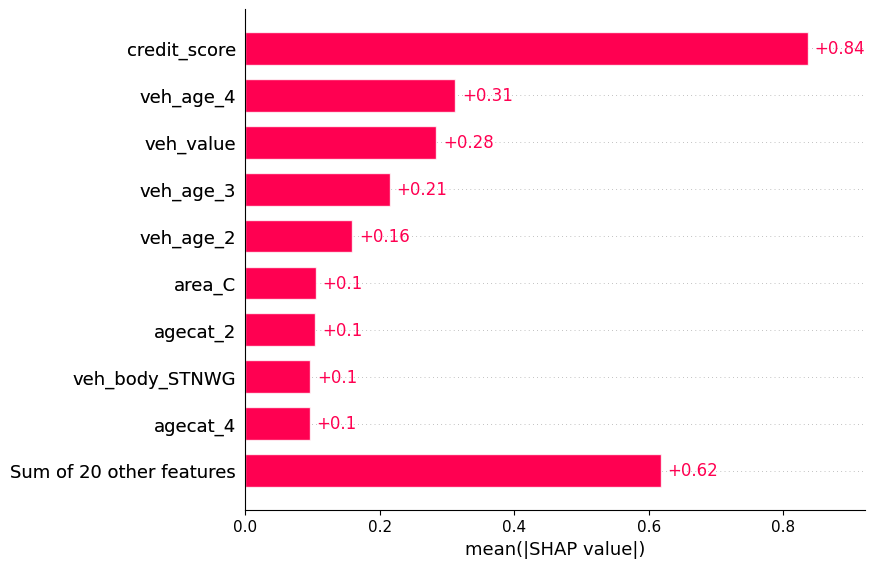

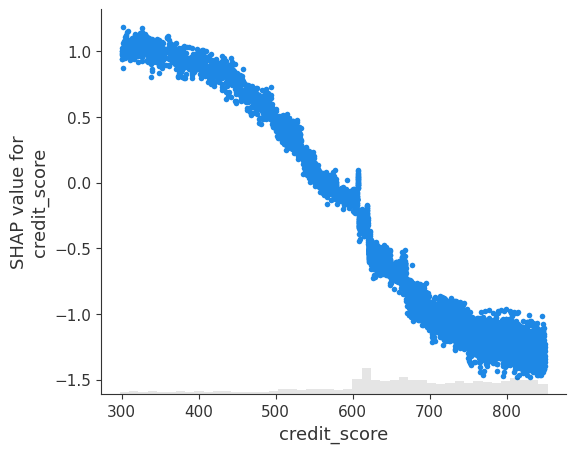

In [53]:
shap.plots.beeswarm(shap_values_reg)
shap.plots.bar(shap_values_reg)
shap.plots.scatter(shap_values_reg[:, 'credit_score'])